In [17]:
import pandas as pd
from pandas import DataFrame, Series
from konlpy.tag import *
import konlpy

import soynlp
from soynlp.word import WordExtractor

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

from collections import Counter

In [18]:
raw = pd.read_csv('Data/Clien/Clien_IPhone_10264.csv', encoding = 'cp949')
#raw.drop('Unnamed: 0', axis = 1, inplace= True)

In [19]:
raw.head()

,A
0,가끔 어떤이유인지 사진과 같이 화면이 살짝 하단으로 내려오는데 이게 뭔지 모르겠습니...
1,배터리 스팩만 비교하면 Xr이 xs max 대비 맞장뜰것 같고... 변강쇠 8플 보...
2,아이폰7에서 X로 바꾼지 3주 정도 됐는데 다 만족스럽지만 각 사이트 로그인 할때 ...
3,자가개통할려고하니 본인명의 신용카드가없어서 개통이안되어서 대리점가서 해달라고했더...
4,그동안 미밴드3 한글화 기다리다가 한글화도 잘 되어 있고 액정도 더 큰 어메이즈핏빕...


In [20]:
review_list = [x.replace('/', '') for x in raw.iloc[:,0]]
review_list = [x.replace(',', '') for x in review_list]
review_list = [x.replace('!', '') for x in review_list]
review_list = [x.replace('?', '') for x in review_list]
review_list = [x.replace('.', '') for x in review_list]
review_list = [x.replace('ㅠ', '') for x in review_list]
review_list = [x.replace('ㅜ', '') for x in review_list]
review_list = [x.replace('생각', '') for x in review_list]
review_list = [x.replace('사용', '') for x in review_list]
review_list = [x.replace('정도', '') for x in review_list]
review_list = [x.replace('정말', '') for x in review_list]
review_list = [x.replace('그냥', '') for x in review_list]
review_list = [x.replace('진짜', '') for x in review_list]
review_list = [x.replace('지금', '') for x in review_list]
review_list = [x.replace('때문', '') for x in review_list]
review_list = [x.replace('혹시', '') for x in review_list]
review_list = [x.replace('이번', '') for x in review_list]
review_list = [x.replace('오늘', '') for x in review_list]
review_list = [x.replace('다시', '') for x in review_list]



In [21]:
twit = Twitter()

temp = twit.nouns(' '.join(review_list))
temp_nouns = [x for x in temp if len(x) > 1]

print(len(temp_nouns))
len(set(temp_nouns))

C:\Users\Dong\AppData\Local\Continuum\anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


74772


7864

In [22]:
counter = Counter(temp_nouns)
counter.most_common(20)

[('아이폰', 1096),
 ('애플', 723),
 ('워치', 491),
 ('구매', 449),
 ('문제', 426),
 ('가격', 393),
 ('모델', 374),
 ('화면', 362),
 ('사진', 341),
 ('카메라', 316),
 ('케이스', 300),
 ('한국', 297),
 ('리퍼', 289),
 ('미국', 273),
 ('설정', 271),
 ('가요', 268),
 ('배터리', 264),
 ('하나', 256),
 ('고민', 254),
 ('배송', 252)]

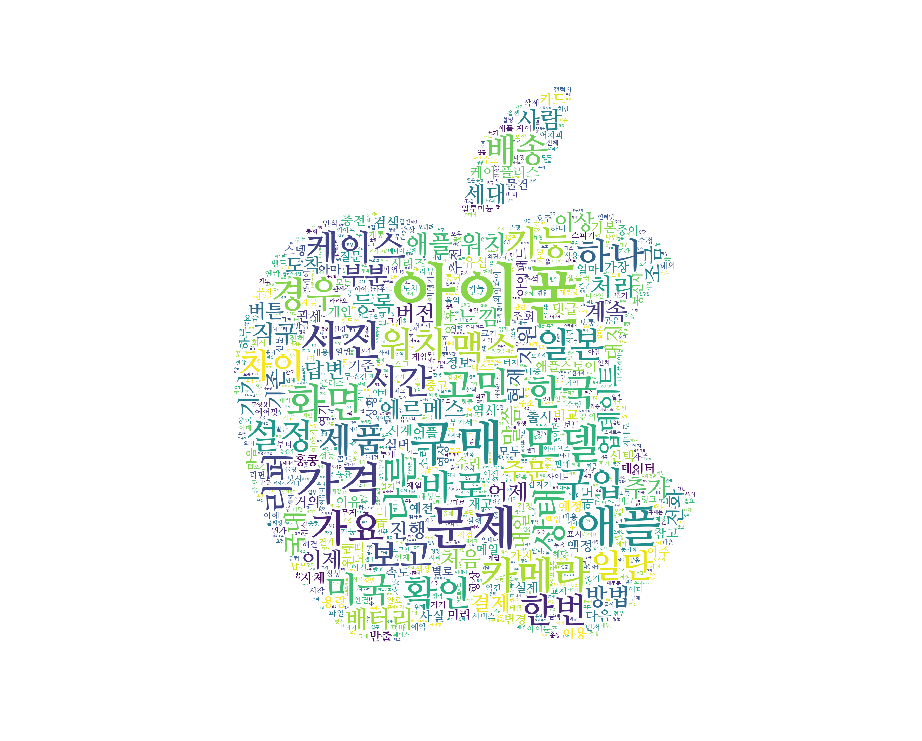

In [23]:
font_path = '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf'

img_mask = np.array(Image.open('apple.jpg'))
plt.figure(figsize = (18,13))
fontsize = 200

word_cloud = WordCloud(background_color = 'white',
                       font_path = font_path,
                       mask = img_mask,
                       max_words = 1000,
                       max_font_size= fontsize,
                      )

wc = word_cloud.generate(' '.join(temp_nouns))

plt.imshow(wc)
plt.axis('off')
plt.show()